In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the Dataset
df = pd.read_csv("/home/inventor/Datasets/House Prediction/House_Prediction/data.csv")

In [43]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [44]:
df.shape

(4600, 18)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [46]:
# Remove the Columns 

city = df["city"]

df.drop(columns=["date", "street", "statezip", "city", "country"], axis=1, inplace=True)

In [47]:
city

0       Shoreline
1         Seattle
2            Kent
3        Bellevue
4         Redmond
          ...    
4595      Seattle
4596     Bellevue
4597       Renton
4598      Seattle
4599    Covington
Name: city, Length: 4600, dtype: object

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


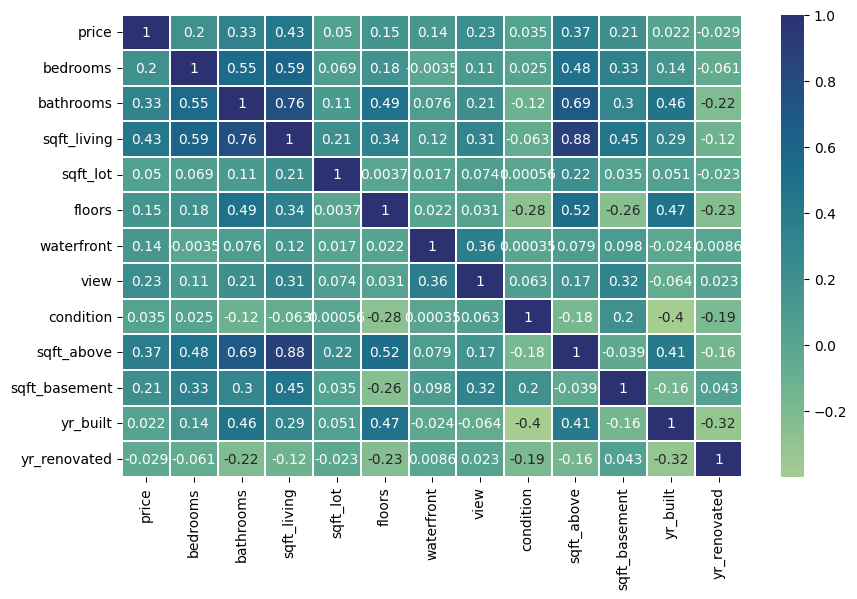

In [49]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("crest", as_cmap=True), linewidths=0.2)
plt.show()

In [50]:
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


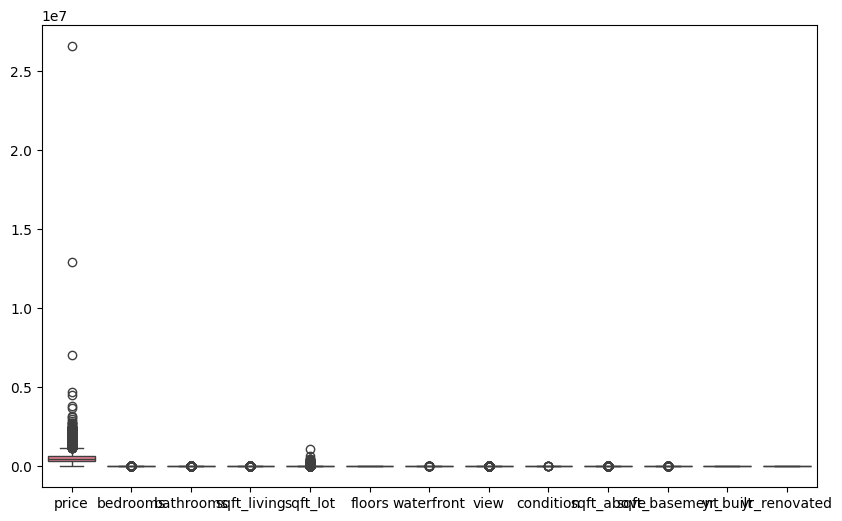

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [53]:
# Change the columns datatype
df["price"] = df["price"].astype("int64")
df["bathrooms"] = df["bathrooms"].astype("int64")
df["bathrooms"] = df["bedrooms"].astype("int64")
df["floors"] = df["floors"].astype("int64")

In [54]:
# Normalize 
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

In [55]:
num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]

In [56]:
df[num_cols] = normalizer.fit_transform(df[num_cols])

In [57]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.011771,0.333333,0.333333,0.073652,0.006775,0.0,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531
1,0.089658,0.555556,0.555556,0.249051,0.007835,0.5,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000
2,0.012862,0.333333,0.333333,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000
3,0.015795,0.333333,0.333333,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000
4,0.020684,0.444444,0.444444,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   float64
 4   sqft_lot       4600 non-null   float64
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   float64
 7   view           4600 non-null   float64
 8   condition      4600 non-null   float64
 9   sqft_above     4600 non-null   float64
 10  sqft_basement  4600 non-null   float64
 11  yr_built       4600 non-null   float64
 12  yr_renovated   4600 non-null   float64
dtypes: float64(13)
memory usage: 467.3 KB


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("price", axis=1), df["price"], test_size=0.2, random_state=42)

In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3680, 12), (3680,), (920, 12), (920,))

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred_sk = lr.predict(X_test)

In [64]:
from sklearn.metrics import r2_score
r2_score_sk = r2_score(y_test, y_pred_sk)
r2_score_sk

0.03063208905826964

In [91]:
lr.coef_, lr.intercept_

(array([-0.00994198, -0.00994198,  0.05556549, -0.02081896,  0.00605992,
         0.01440343,  0.00683528,  0.0044371 ,  0.06327897,  0.03314432,
        -0.01088866,  0.00048841]),
 np.float64(0.010376364953074986))

In [69]:
# convert to array
X_train = np.array(X_train)
y_train = np.array(y_train)

In [161]:
import random

class MiniBatch_GD():

    def __init__(self, batch_size, learning_rate, epochs):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = np.random.choice(X_train.shape[0], self.batch_size, replace=False)
                
                y_hat = np.dot(X_train[idx], self.coef_)

                # Calculate the error
                error = y_train[idx] - y_hat

                intercept_slope = -2 * np.mean(error)
                self.coef_[0] = self.coef_[0] * (self.lr * intercept_slope)
                
                coef_slope = -2 * np.dot(error, X_train[idx]) / self.batch_size
                self.coef_ = self.coef_ + (self.lr * coef_slope)

        print(f"Coef_: {self.coef_[1:]}")

    def predict(self, X_test):
        X_test = np.insert(X_test, 0,1, axis=1)
        y_pred = np.dot(X_test, self.coef_)
        return y_pred


In [164]:
mgd = MiniBatch_GD(batch_size=64, learning_rate=0.00001, epochs=500)

In [165]:
mgd.fit(X_train, y_train)

Coef_: [2.01295938 2.01295938 1.37613089 1.03596246 1.66942328 1.02920756
 1.19576129 2.58745501 1.44992146 1.18389081 2.66450731 2.1562671 ]


In [166]:
y_pred = mgd.predict(X_test)

In [167]:
np.random.choice(X_train.shape[0], 32, replace=False)

array([1010,  339, 2025, 2840,   10, 2906,  123, 2392, 3238, 1897, 1357,
       2131, 1589, 2016, 1408, 3497, 3096,   92,  602, 2354,  709,  640,
        715, 2991, 2078,  743,  464,  264,  211, 1616, 1115, 3639])

In [168]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score

In [169]:
r2_score_c = r2_score_custom(y_test, y_pred)

In [170]:
r2_score_c

np.float64(-31960.883169998186)

In [171]:
r2_score(y_test, y_pred)

-31960.883169998186

In [172]:
from sklearn.linear_model import SGDRegressor

In [173]:
sgd = SGDRegressor(max_iter=100, learning_rate="constant")

In [174]:
sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [175]:
y_pred_sgd = sgd.predict(X_test)

/home/inventor/Machine_learning/machinelearning/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [176]:
r2_score(y_test, y_pred_sgd)

0.03402428297406501